<a href="https://colab.research.google.com/github/Mrvrinder/AbnormalBehaviourDetection-/blob/main/PatientData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

~ ***Dissertation***



**WARNING: Please run each block of code individually, in the correct order from topto bottom. 
Thank you

Vrinder Chandar

Student ID: S1628526
Project Title: "Detection of Abnormal Activity in Movements of Patients with Dementia"

Imports

In [ ]:
#This does not work 
#from sklearn.preprocessing import Imputer

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from sklearn.model_selection import train_test_split, KFold
from sklearn import model_selection
from sklearn.svm import SVC
%matplotlib inline
import itertools
import random  # for test data
import seaborn as sns
from sklearn import metrics
import sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score
from sklearn.utils import resample

from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import OneClassSVM

from numpy import where
from datetime import date,datetime,timedelta
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1wSGKW7EEeTxfJB4_h9hV-Igp7YLUBl1B'})   #https://drive.google.com/file/d/1wSGKW7EEeTxfJB4_h9hV-Igp7YLUBl1B/view?usp=sharing  #1wSGKW7EEeTxfJB4_h9hV-Igp7YLUBl1B
downloaded.GetContentFile('BobPatientDataCSV.csv')  
df3 = pd.read_csv('BobPatientDataCSV.csv')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df = pd.read_csv('BobPatientDataCSV.csv', parse_dates=['Start time', 'End time'])   
#df = pd.read_csv('BobPatientDataCSV.csv')

In [ ]:
df.head(5)

,Start time,End time,Location,Type,Place,Activity,Duration (Minutes),Anomaly
0,2011-11-28 02:27:00,2011-11-28 10:18:00,Bed,Pressure,Bedroom,Sleeping,471,0
1,2011-11-28 10:21:00,2011-11-28 10:21:00,Cabinet,Magnetic,Bathroom,Toileting,0,0
2,2011-11-28 10:21:00,2011-11-28 10:23:00,Basin,PIR,Bathroom,Toileting,2,0
3,2011-11-28 10:23:00,2011-11-28 10:23:00,Toilet,Flush,Bathroom,Toileting,0,0
4,2011-11-28 10:25:00,2011-11-28 10:32:00,Shower,PIR,Bathroom,Showering,7,0


In [ ]:
df.tail(5)

,Start time,End time,Location,Type,Place,Activity,Duration (Minutes),Anomaly
614,2011-12-22 20:38:00,2011-12-22 20:38:00,Fridge,Magnetic,Kitchen,Dinner,0,0
615,2011-12-22 20:39:00,2011-12-22 20:39:00,Toilet,Flush,Bathroom,Toileting,0,0
616,2011-12-22 20:45:00,2011-12-23 23:32:00,Seat,Pressure,Living,Spare_Time/TV,167,0
617,2011-12-23 23:35:00,2011-12-23 23:37:00,Toilet,Flush,Bathroom,Toileting,2,0
618,2011-12-23 23:42:00,2011-12-23 16:00:00,Bed,Pressure,Bedroom,Sleeping,978,1


In [ ]:
print(df.count())

Start time            619
End time              619
Location              619
Type                  619
Place                 619
Activity              619
Duration (Minutes)    619
Anomaly               619
dtype: int64


In [ ]:
print (df['Location'].unique())

['Bed' 'Cabinet' 'Basin' 'Toilet' 'Shower' 'Fridge' 'Cupboard' 'Toaster'
 'Cooktop' 'Microwave' 'Seat' 'Maindoor']


In [ ]:
print (df['Type'].unique())

['Pressure' 'Magnetic' 'PIR' 'Flush' 'Electric']


In [ ]:
print (df['Place'].unique())

['Bedroom' 'Bathroom' 'Kitchen' 'Living' 'Entrance']


In [ ]:
print (df['Activity'].unique())

['Sleeping' 'Toileting' 'Showering' 'Breakfast' 'Grooming' 'Spare_Time/TV'
 'Leaving' 'Lunch' 'Dinner' 'Snack']


In [ ]:
#checking the datatype
print (df.dtypes)

Start time            datetime64[ns]
End time              datetime64[ns]
Location                      object
Type                          object
Place                         object
Activity                      object
Duration (Minutes)             int64
Anomaly                        int64
dtype: object


In [ ]:
# Checking Missing values or null entries in the dataset
print (df.isnull().sum())

Start time            0
End time              0
Location              0
Type                  0
Place                 0
Activity              0
Duration (Minutes)    0
Anomaly               0
dtype: int64


In [ ]:
df = df.rename(columns={"Duration (Minutes)":"Duration"})

Data Exploration

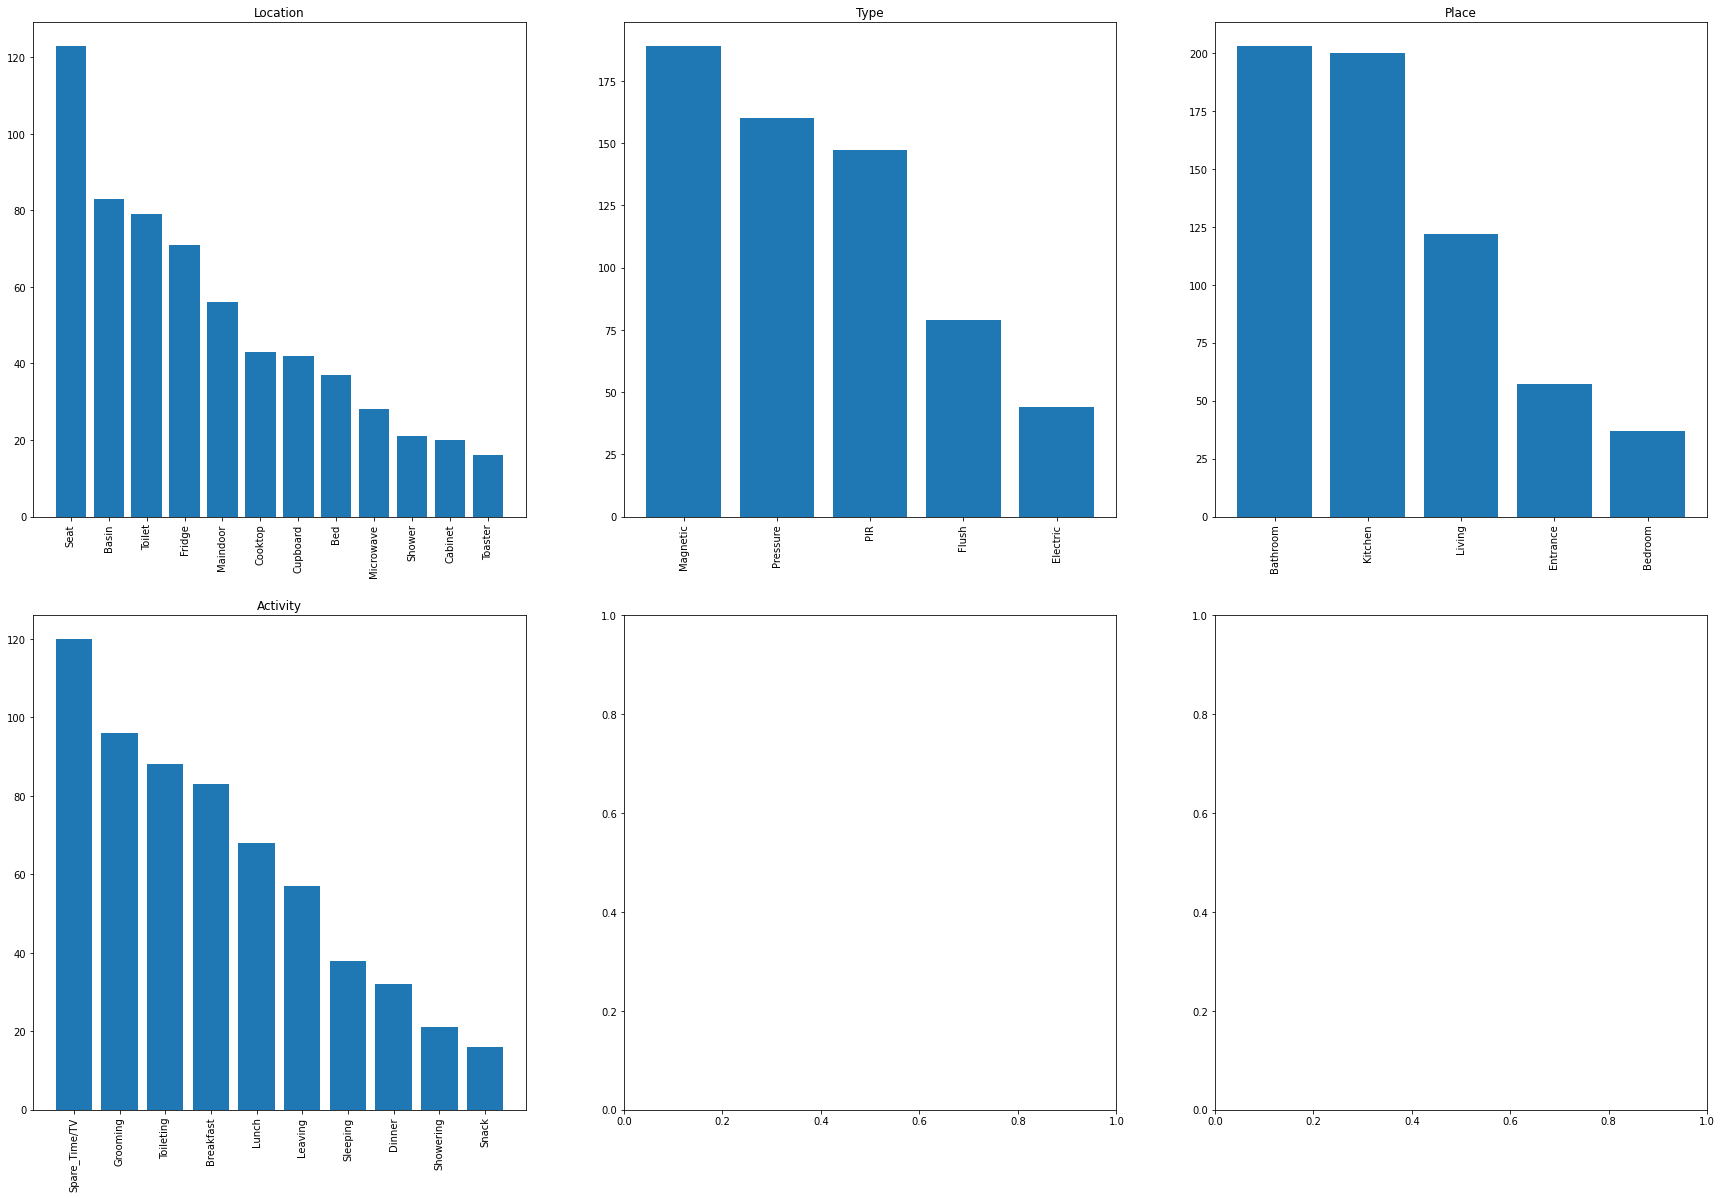

In [ ]:
#this presents the categorical data - data exploration 

category_columns = ['Location','Type', 'Place', 'Activity']

fig, axs = plt.subplots(2,3, sharex=False, sharey=False, figsize=(30, 20))

total_count = 0
for category_columns in category_columns:
    val_count = df[category_columns].value_counts()
    
    trace_x = total_count //3
    trace_y = total_count % 3
    
    
    x_pos = np.arange(0, len(val_count))
    
    axs[trace_x, trace_y].bar(x_pos, val_count.values, tick_label = val_count.index)
    axs[trace_x, trace_y].set_title(category_columns)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    total_count += 1

plt.show()

In [ ]:
print (df.describe(include=['object']))

       Location      Type     Place       Activity
count       619       619       619            619
unique       12         5         5             10
top        Seat  Magnetic  Bathroom  Spare_Time/TV
freq        123       189       203            120


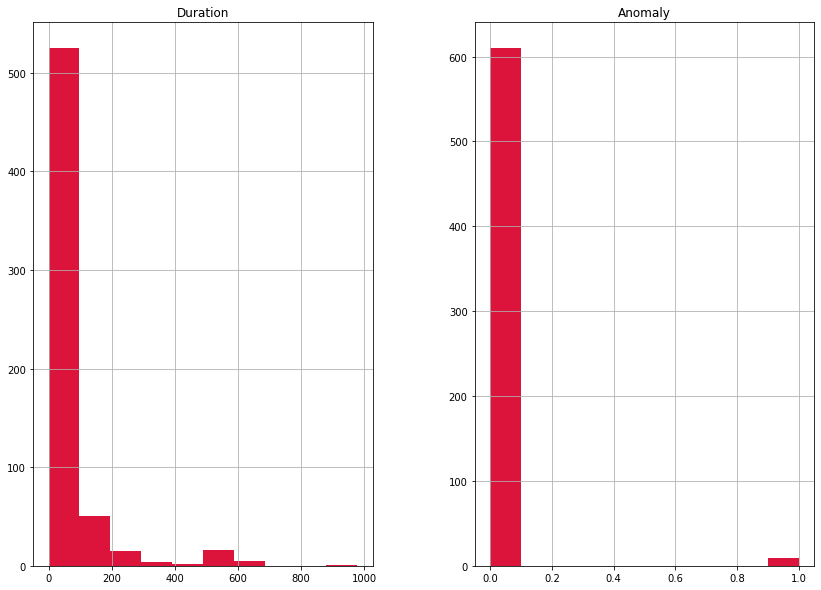

In [ ]:
#Visualization of the numerical attributes
df.hist(bins=10, figsize=(14,10), color='#DC143C')
plt.show()

In [ ]:
df.describe()

,Duration,Anomaly
count,619.000000,619.000000
mean,49.877221,0.014540
std,121.581759,0.119797
min,0.000000,0.000000
25%,0.000000,0.000000
50%,2.000000,0.000000
75%,30.000000,0.000000
max,978.000000,1.000000


In [ ]:
#show values of all months 

df["Place"].value_counts()

Bathroom    203
Kitchen     200
Living      122
Entrance     57
Bedroom      37
Name: Place, dtype: int64

In [ ]:
Normal = len(df[df.Anomaly == 1])
Abnormal = len(df[df.Anomaly == 0])
print("Abnormalities",Normal); print("Normalities", Abnormal)

Abnormalities 9
Normalities 610


In [ ]:
df.dtypes

Start time    datetime64[ns]
End time      datetime64[ns]
Location              object
Type                  object
Place                 object
Activity              object
Duration               int64
Anomaly                int64
dtype: object

In [ ]:
# The adjusted close accounts for stock splits, so that is what we should graph
#X.plot(X.index, X['Location'])
#X.title('Locations')
#X.ylabel('Locations ($)');
#X.show()

In [ ]:
df['Start time'].head()

0   2011-11-28 02:27:00
1   2011-11-28 10:21:00
2   2011-11-28 10:21:00
3   2011-11-28 10:23:00
4   2011-11-28 10:25:00
Name: Start time, dtype: datetime64[ns]

In [ ]:
df['Start time'].min()

Timestamp('2011-01-12 01:37:00')

In [ ]:
df['End time'].min()

Timestamp('2011-01-12 01:34:00')

In [ ]:
df['Start time'].max()

Timestamp('2011-12-23 23:42:00')

In [ ]:
df['End time'].max()

Timestamp('2011-12-23 23:37:00')

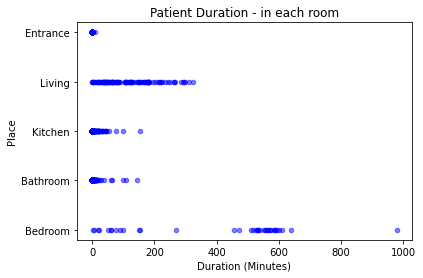

In [ ]:
#Scatter plot of duration of patient in each room at home'
df.plot(kind = 'scatter', x='Duration', y = 'Place', alpha = 0.5, color = 'b')
plt.xlabel("Duration (Minutes)")
plt.ylabel("Place")
plt.title("Patient Duration - in each room")
plt.show()

We can see thoughout the time, the patient has been  spending a lot of time in the living  room. However, this cannot be defined as an anomaly. However, it is clear that there are activity anomalies, defined as outliers. Ouliers seem to be activities performed in the bathroom, kitchen and bedroom. So fuurther investigation is required.  

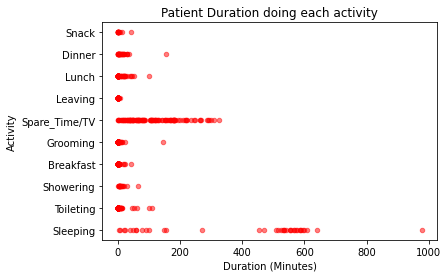

In [ ]:
#Scatter plot of Patient's duration in Minutes doing each activity
df.plot(kind = 'scatter', x='Duration', y = 'Activity', alpha = 0.5, color = 'r')
plt.xlabel("Duration (Minutes)")
plt.ylabel("Activity")
plt.title("Patient Duration doing each activity")
plt.show()

The patient seems to have outliers in dinner, lunch, sleeping, grooming, showering and sleeping. These activities seem to have outliers as they are  normal for a patient to sleep 250-300 minutes.
1. Patient has spend an abnormal amount of time having snacks in the bathroom,in comparison the other times. 
2. Patient has spent a lot of unexpected time having dinner, in comparison to the other times. 
3. Patient has spent a lot of unexpected time having lunch, in comparison to the other times.
4. Patient has spent a lot of unexpected time grooming, in comparison to the other times.
5. Patient has spent a lot of unexpected time toileting, in comparison to the other times.
6. Patient has spent a lot of unexpected time showering, in comparison to the other times.
6. Patient has spent a lot of unexpected time sleeping (15 hours), in comparison to the other times.

In [ ]:
#Spliting the start date in a different column
df['StartDate'] = df['Start time'].dt.date

In [ ]:
visual=pd.DataFrame(df[['StartDate', 'Activity', 'Duration']])
hols = visual.groupby(['StartDate', 'Activity'])['Duration'].sum().reset_index()
hols2 = hols.pivot(index='StartDate', columns='Activity', values='Duration') 

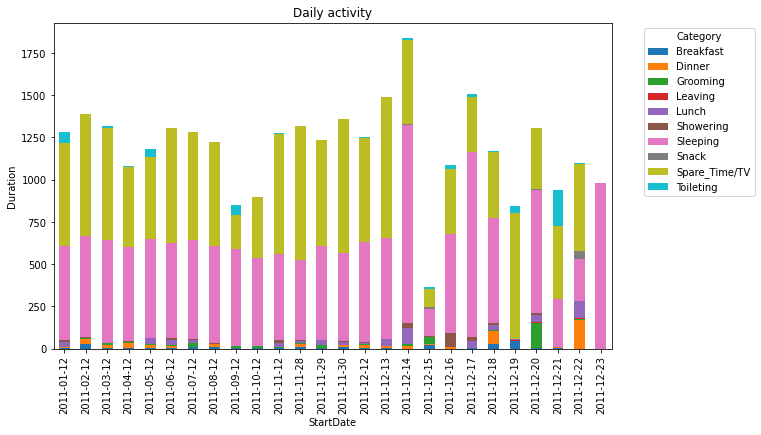

In [ ]:
# plot the pivoted dataframe
hols2.plot.bar(stacked=True, figsize=(10, 6), ylabel='Duration', xlabel='StartDate', title='Daily activity')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The Above diagram also shows the duration of each activity on daily basis. However, in the diagram it is hard distinguish between the activity anomalies. Therefore it has been decided not to be documented.  

2nd activity diagram 

In [ ]:
df = df.drop(['StartDate'],axis=1)

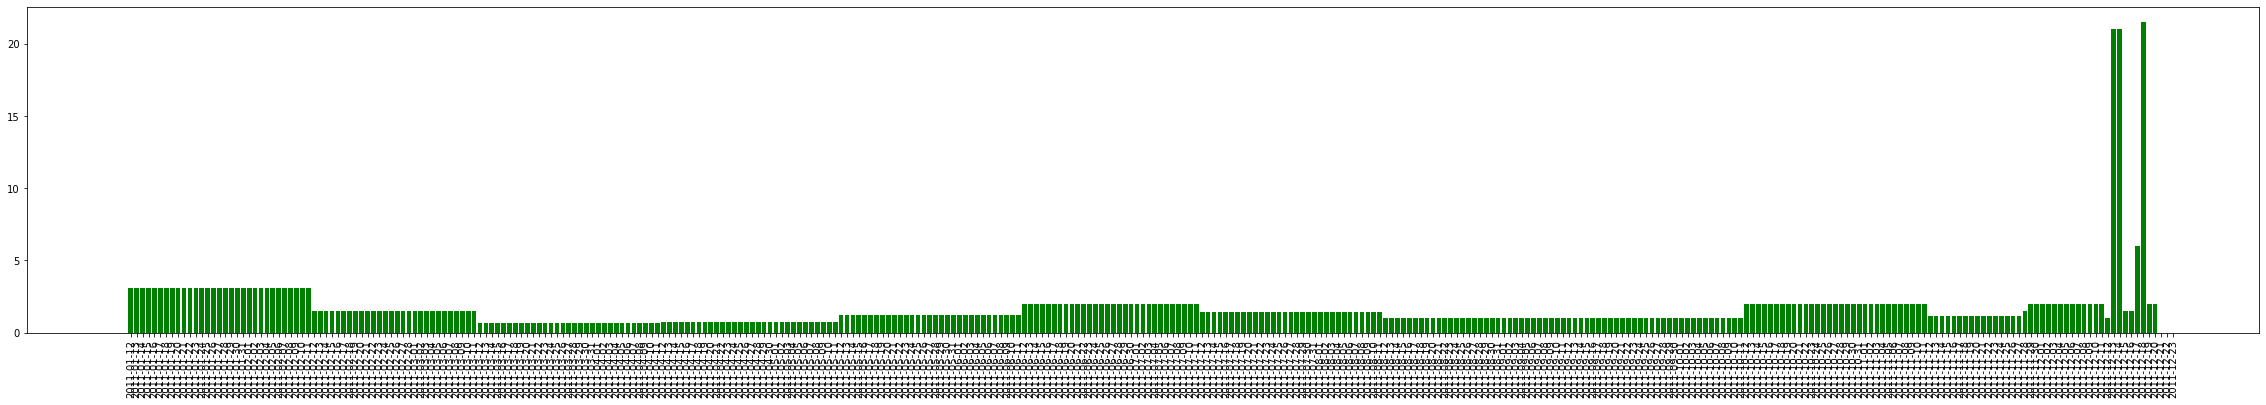

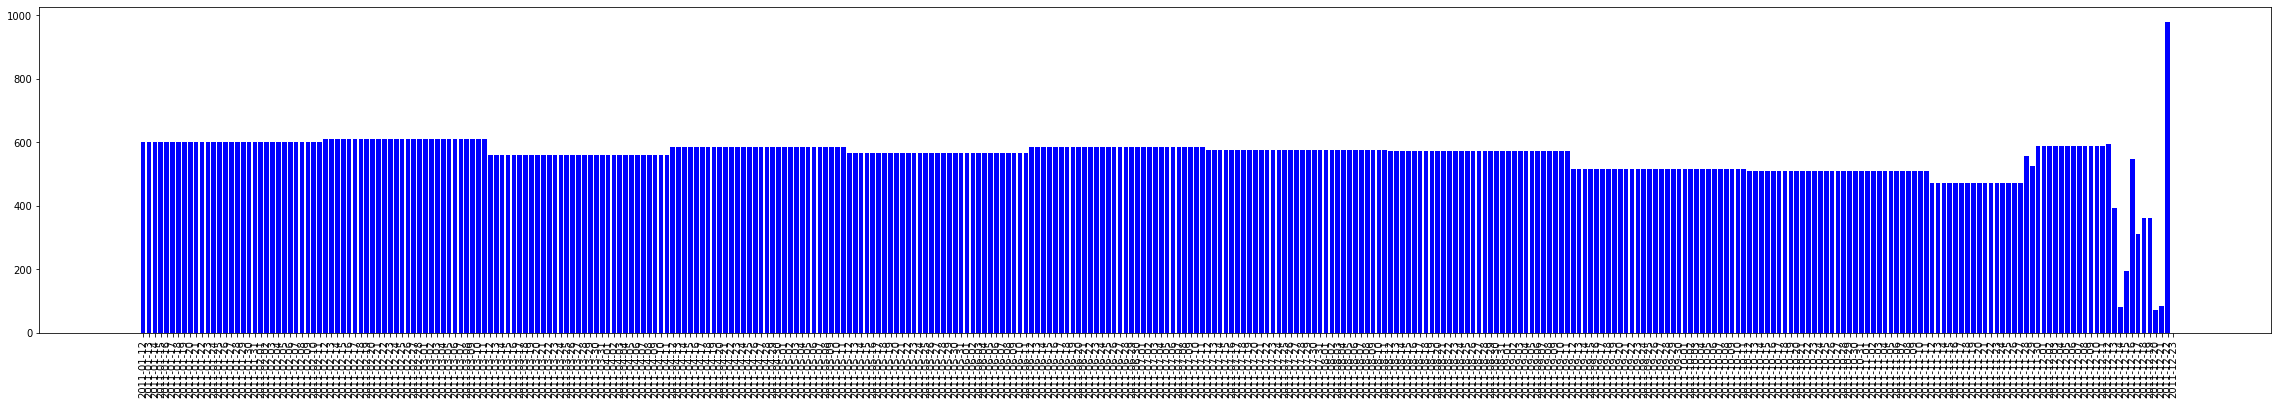

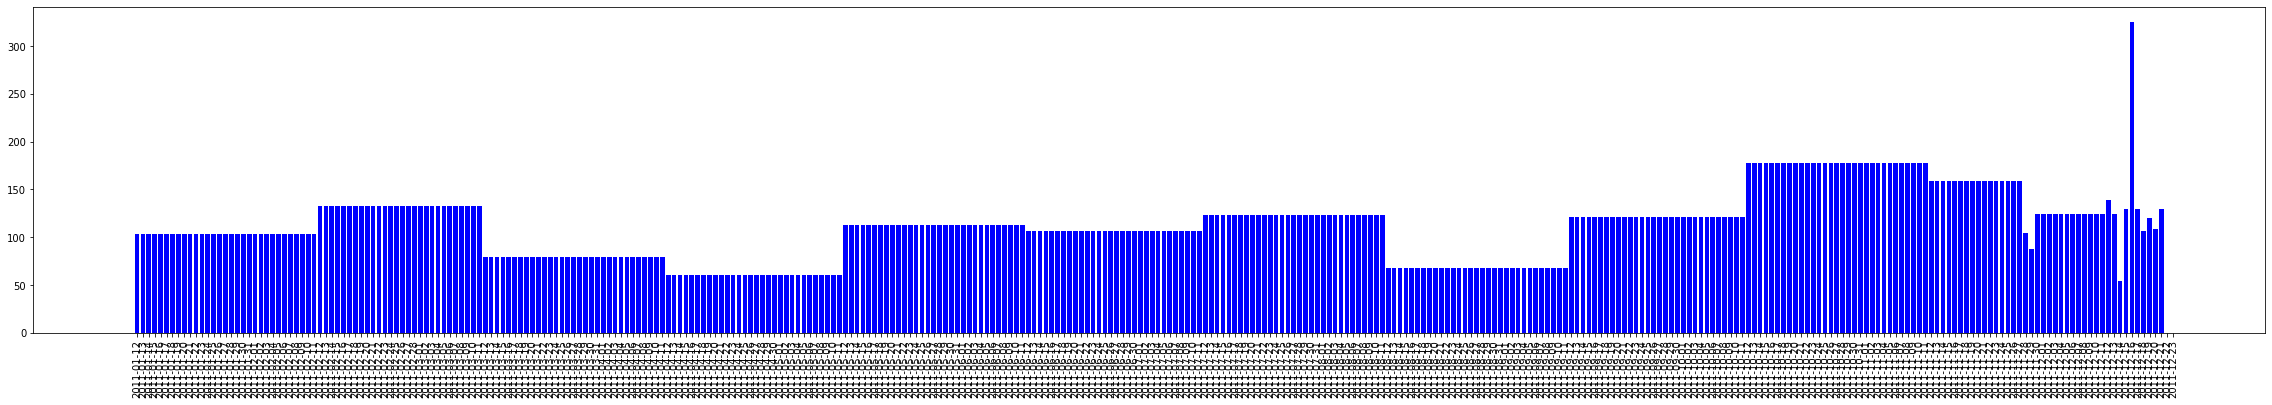

In [ ]:
visual = df.copy()
visual = visual.set_index('Start time')
grouped=visual.groupby(['Activity',visual.index.dayofyear]).groups

summary_df=pd.DataFrame(columns=['Activity','DayOfYear','Duration','Date'])
for index, group in grouped.items():
  activity=index[0]
  dayofyear=index[1]
  filter = (visual['Activity']==activity) & (visual.index.dayofyear==dayofyear)
  duration = visual[filter]['Duration'].mean()
  date = visual[filter].index.date.max()
  summary_df.loc[len(summary_df)]=[activity,dayofyear,duration,date]


summary_df=summary_df.set_index('Date')

min_date=visual.index.min()
max_date=visual.index.max()


daily=pd.date_range(start=min_date,end=max_date,freq='D')
activity=['Breakfast','Sleeping']
filter=summary_df.Activity=='Breakfast'
breakfast=summary_df[filter]
breakfast=breakfast.reindex(daily, method='bfill')

filter=summary_df.Activity=='Sleeping'
sleeping=summary_df[filter]
sleeping=sleeping.reindex(daily,method='bfill')

filter=summary_df.Activity=='Spare_Time/TV'
spare_time=summary_df[filter]
spare_time=spare_time.reindex(daily,method='bfill')


plt.figure(figsize=(40,6))
plt.bar(daily,breakfast['Duration'],color='green')
plt.xticks(rotation=90)
plt.xticks(daily)
plt.show()
plt.figure(figsize=(40,6))
plt.bar(daily,sleeping['Duration'],color='blue')
plt.xticks(rotation=90)
plt.xticks(daily)
plt.show()
plt.figure(figsize=(40,6))
plt.bar(daily,spare_time['Duration'],color='blue')
plt.xticks(rotation=90)
plt.xticks(daily)
plt.show()

- Again, the above diagram is a trial for identification of activity abnormalities. Unfortunately the diagram is not clear, so It has not been documented in the dissertation. 

# Data Transformation 

In [ ]:
obj_df = df.select_dtypes(include=['object']).copy()

In [ ]:
#Splitting the catagorical variable to 0s and 1s using LabelEncoder

LabelEncoder().fit_transform(['no','yes'])
Location = LabelEncoder().fit_transform(df['Location'])
Place = LabelEncoder().fit_transform(df['Place'])
Type = LabelEncoder().fit_transform(df['Type'])
Activity = LabelEncoder().fit_transform(df['Activity'])

obj_df['Location'] = Location
obj_df['Place']= Place
obj_df['Type'] = Type
obj_df['Activity'] = Activity

obj_df['Duration'] = df['Duration']
obj_df['Anomaly'] = df['Anomaly']


obj_df['Start time'] = df['Start time']
obj_df['End time'] = df['End time']
X = obj_df #assigns input variables to X, to put it through the machines 


In [ ]:
# # I am converting the start Day here
# X['Start Day'] = df['Start time'].dt.day
# # I am converting the start time here 
# X['Start Month'] = df['Start time'].dt.month
# # Here I am convering the "End time" datatime64 hour and minute  
# X['Start Hour'] = df['Start time'].dt.hour
# # Here I get the start hour 
# X['Start Minute'] = df['Start time'].dt.minute



# # Here I get the start hour 
# X['End Day'] = df['End time'].dt.day
# # Here I get the start hour 
# X['End Month'] = df['End time'].dt.month
# # Here I get the start hour 
# X['End Hour'] = df['End time'].dt.hour
# # Here I get the start hour 
# X['End Minute'] = df['End time'].dt.minute

In [ ]:
X.head()

,Location,Type,Place,Activity,Duration,Anomaly,Start time,End time
0,1,4,1,6,471,0,2011-11-28 02:27:00,2011-11-28 10:18:00
1,2,2,0,9,0,0,2011-11-28 10:21:00,2011-11-28 10:21:00
2,0,3,0,9,2,0,2011-11-28 10:21:00,2011-11-28 10:23:00
3,11,1,0,9,0,0,2011-11-28 10:23:00,2011-11-28 10:23:00
4,9,3,0,5,7,0,2011-11-28 10:25:00,2011-11-28 10:32:00



# Class Impalance: Since this is an unbalanced dataset, we need to take an extra step to take a subsample — known as undersampling 

In [ ]:
X['Anomaly'].value_counts()

0    610
1      9
Name: Anomaly, dtype: int64

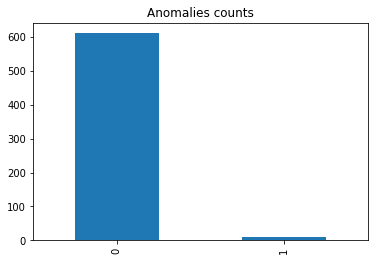

In [ ]:
value_counts = X['Anomaly'].value_counts()

value_counts.plot.bar(title = 'Anomalies counts')

Original Data distribution
0    610
1      9
Name: Anomaly, dtype: int64
Sci-Kit Learn : resample : Down Sampled data set
1    9
0    9
Name: Anomaly, dtype: int64
Num records =  18


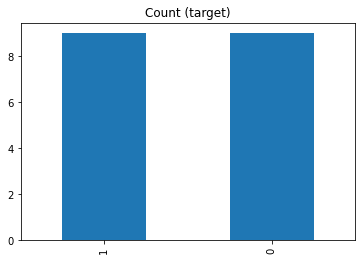

In [ ]:
print("Original Data distribution")
print(X['Anomaly'].value_counts())

# The majority class is getting down sampled
dSampling = resample(X[X['Anomaly']==0],
replace = True, 
n_samples = X[X['Anomaly']==1].shape[0], #Minority class is matched here
random_state=42) 

# I combine the majority class with the  minority class here
train_downsample = pd.concat([X[X['Anomaly']==1], dSampling])

# I display the count for the new class
print('Sci-Kit Learn : resample : Down Sampled data set')
print(train_downsample['Anomaly'].value_counts())
print("Num records = ", train_downsample.shape[0])
train_downsample.Anomaly.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
print(X.dtypes)

Location               int64
Type                   int64
Place                  int64
Activity               int64
Duration               int64
Anomaly                int64
Start time    datetime64[ns]
End time      datetime64[ns]
dtype: object


# Correlation Matix 

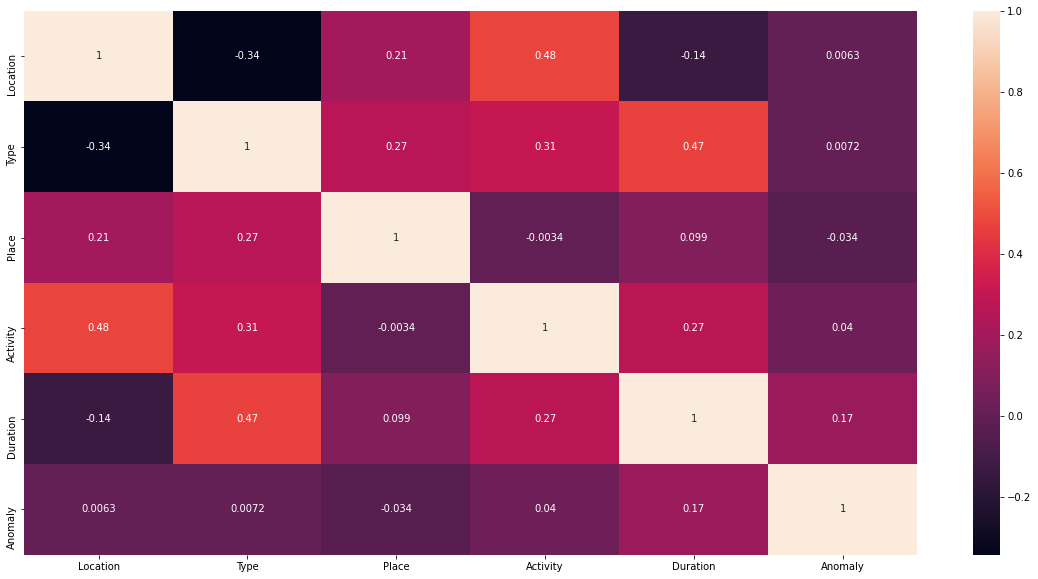

In [ ]:
plt.figure(figsize=(20,10)) 
sns.heatmap(X.corr(), annot=True) 

In [ ]:
df = df.drop(['Anomaly'],axis=1)
df

,Start time,End time,Location,Type,Place,Activity,Duration
0,2011-11-28 02:27:00,2011-11-28 10:18:00,Bed,Pressure,Bedroom,Sleeping,471
1,2011-11-28 10:21:00,2011-11-28 10:21:00,Cabinet,Magnetic,Bathroom,Toileting,0
2,2011-11-28 10:21:00,2011-11-28 10:23:00,Basin,PIR,Bathroom,Toileting,2
3,2011-11-28 10:23:00,2011-11-28 10:23:00,Toilet,Flush,Bathroom,Toileting,0
4,2011-11-28 10:25:00,2011-11-28 10:32:00,Shower,PIR,Bathroom,Showering,7
...,...,...,...,...,...,...,...
614,2011-12-22 20:38:00,2011-12-22 20:38:00,Fridge,Magnetic,Kitchen,Dinner,0
615,2011-12-22 20:39:00,2011-12-22 20:39:00,Toilet,Flush,Bathroom,Toileting,0
616,2011-12-22 20:45:00,2011-12-23 23:32:00,Seat,Pressure,Living,Spare_Time/TV,167
617,2011-12-23 23:35:00,2011-12-23 23:37:00,Toilet,Flush,Bathroom,Toileting,2


In [ ]:
# Here I am separating the target variable in a different dataset 
x=X
x = x.drop(['Anomaly'],axis=1)
y = obj_df['Anomaly']

# K-NN Unsuprvised Anomaly Detection  

In [ ]:
# converting columns into arrays 
xtrial2 = x.iloc[:, 3:5]
x_trial3 = xtrial2.values

In [ ]:
from sklearn.neighbors import NearestNeighbors
# Model initiation
knn = NearestNeighbors(n_neighbors = 3)

In [ ]:
# model fitting
knn.fit(x_trial3)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

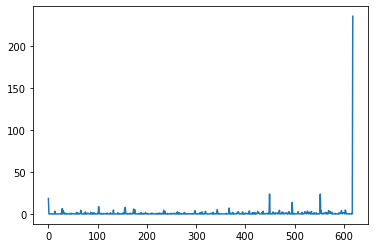

In [ ]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = knn.kneighbors(x_trial3)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

In [ ]:
# visually determine cutoff point for anomalies > 
outlier_index = np.where(distances.mean(axis = 1) > 3)
# filter outlier values
out_values = x.iloc[outlier_index]
out_values

,Location,Type,Place,Activity,Duration,Start time,End time
0,1,4,1,6,471,2011-11-28 02:27:00,2011-11-28 10:18:00
13,8,4,4,8,134,2011-11-28 10:51:00,2011-11-28 13:05:00
28,8,4,4,8,249,2011-11-28 16:10:00,2011-11-28 20:19:00
30,8,4,4,8,299,2011-11-28 20:45:00,2011-11-29 01:44:00
66,1,4,1,6,525,2011-11-30 01:22:00,2011-11-30 10:07:00
102,8,4,4,8,310,2011-11-30 20:24:00,2011-01-12 01:34:00
132,1,4,1,6,600,2011-02-12 02:15:00,2011-02-12 12:15:00
155,8,4,4,8,235,2011-02-12 21:46:00,2011-03-12 01:41:00
156,1,4,1,6,609,2011-03-12 01:47:00,2011-03-12 11:40:00
173,8,4,4,8,195,2011-03-12 20:38:00,2011-03-12 23:53:00


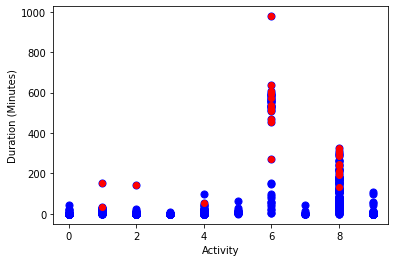

In [ ]:
# plot data
plt.scatter(x["Activity"], x["Duration"], color = "b", s = 50)
plt.xlabel("Activity")
plt.ylabel("Duration (Minutes)")
# plot outlier values
plt.scatter(out_values["Activity"], out_values["Duration"], color = "r")

# One Class SVM

In [ ]:
# model specification
SVMmodel = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03).fit(x_trial3)

In [ ]:
# prediction
y_predicted = SVMmodel.predict(x_trial3)
# filter outlier index
outl_index2 = where(y_predicted == -1) # filter outlier values
outl_values = x.iloc[outl_index2]
outl_values

,Location,Type,Place,Activity,Duration,Start time,End time
0,1,4,1,6,471,2011-11-28 02:27:00,2011-11-28 10:18:00
28,8,4,4,8,249,2011-11-28 16:10:00,2011-11-28 20:19:00
102,8,4,4,8,310,2011-11-30 20:24:00,2011-01-12 01:34:00
103,1,4,1,6,553,2011-01-12 01:37:00,2011-01-12 10:50:00
112,8,4,4,8,179,2011-01-12 11:30:00,2011-01-12 14:29:00
141,8,4,4,8,129,2011-02-12 12:37:00,2011-02-12 14:46:00
156,1,4,1,6,609,2011-03-12 01:47:00,2011-03-12 11:40:00
196,8,4,4,8,180,2011-04-12 22:00:00,2011-04-12 01:00:00
234,8,4,4,8,211,2011-05-12 21:07:00,2011-06-12 00:38:00
247,8,4,4,8,178,2011-06-12 11:39:00,2011-06-12 14:37:00


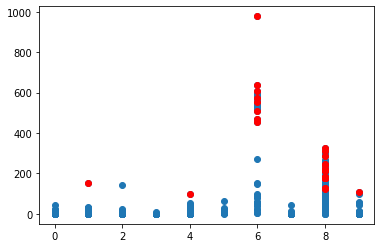

In [ ]:
# visualize outputs
plt.scatter(x["Activity"], x["Duration"])
plt.scatter(outl_values["Activity"], outl_values["Duration"], c = "r")

# Local outlier Factor

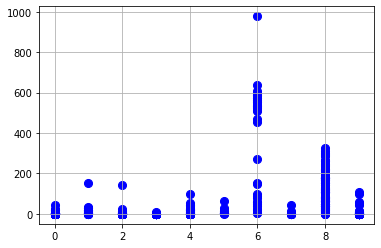

In [ ]:
# I am plotting data points
plt.scatter(x["Activity"], x["Duration"], color = "b", s = 65)
plt.grid()

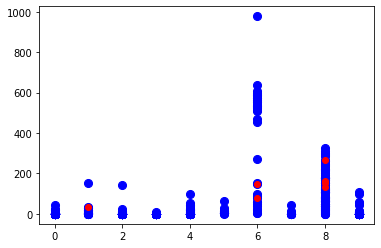

In [ ]:
# Here I start model spec
model1 = LocalOutlierFactor(n_neighbors = 1, metric = "manhattan", contamination = 0.01)
# model fitting
y_pred = model1.fit_predict(x_trial3)
# filtering the outlier index
outlier_index = where(y_pred == -1) # negative values are outliers and positives inliers
# filter the outlier values
outlier_values = x.iloc[outlier_index]
# plot data
plt.scatter(x["Activity"], x["Duration"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["Activity"], outlier_values["Duration"], color = "r")

# Isolation Forest 

In [ ]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

<function matplotlib.pyplot.grid>

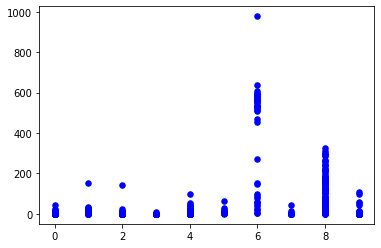

In [ ]:
# using just numpy array for visualization
plt.scatter(X["Activity"], X["Duration"], color = "b", s = 30)
plt.grid

In [ ]:
# instantiate model
modelIS = IsolationForest(n_estimators = 10)
# fit model
modelIS.fit(X)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=10,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

# Evaluation

None of the 11 algorithms I wrote about so far is good or better in an absolute sense, it all comes down to the nature of the dataset and the domain it is coming from. Often a simple statistical algorithm (e.g. boxplot) is good enough to filter possible candidates and in other cases, a sophisticated algorithm can be useless.

For Evaluation Purposes: We compare the detected outliers wi the actual outliers for Each implemented algorithm

In [ ]:
mergedKNN = out_values.merge(y, left_index=True, right_index=True, how='inner')
mergedKNN

,Location,Type,Place,Activity,Duration,Start time,End time,Anomaly
0,1,4,1,6,471,2011-11-28 02:27:00,2011-11-28 10:18:00,0
13,8,4,4,8,134,2011-11-28 10:51:00,2011-11-28 13:05:00,0
28,8,4,4,8,249,2011-11-28 16:10:00,2011-11-28 20:19:00,0
30,8,4,4,8,299,2011-11-28 20:45:00,2011-11-29 01:44:00,0
66,1,4,1,6,525,2011-11-30 01:22:00,2011-11-30 10:07:00,0
102,8,4,4,8,310,2011-11-30 20:24:00,2011-01-12 01:34:00,1
132,1,4,1,6,600,2011-02-12 02:15:00,2011-02-12 12:15:00,0
155,8,4,4,8,235,2011-02-12 21:46:00,2011-03-12 01:41:00,0
156,1,4,1,6,609,2011-03-12 01:47:00,2011-03-12 11:40:00,0
173,8,4,4,8,195,2011-03-12 20:38:00,2011-03-12 23:53:00,0


In [ ]:
mergedKNN.count()

Location      28
Type          28
Place         28
Activity      28
Duration      28
Start time    28
End time      28
Anomaly       28
dtype: int64

In [ ]:
mergedOCSVM = outl_values.merge(y, left_index=True, right_index=True, how='inner')
mergedOCSVM

,Location,Type,Place,Activity,Duration,Start time,End time,Anomaly
0,1,4,1,6,471,2011-11-28 02:27:00,2011-11-28 10:18:00,0
28,8,4,4,8,249,2011-11-28 16:10:00,2011-11-28 20:19:00,0
102,8,4,4,8,310,2011-11-30 20:24:00,2011-01-12 01:34:00,1
103,1,4,1,6,553,2011-01-12 01:37:00,2011-01-12 10:50:00,0
112,8,4,4,8,179,2011-01-12 11:30:00,2011-01-12 14:29:00,0
141,8,4,4,8,129,2011-02-12 12:37:00,2011-02-12 14:46:00,0
156,1,4,1,6,609,2011-03-12 01:47:00,2011-03-12 11:40:00,0
196,8,4,4,8,180,2011-04-12 22:00:00,2011-04-12 01:00:00,0
234,8,4,4,8,211,2011-05-12 21:07:00,2011-06-12 00:38:00,0
247,8,4,4,8,178,2011-06-12 11:39:00,2011-06-12 14:37:00,0


In [ ]:
mergedOCSVM.count()

Location      34
Type          34
Place         34
Activity      34
Duration      34
Start time    34
End time      34
Anomaly       34
dtype: int64

In [ ]:
mergedLOF = outlier_values.merge(y, left_index=True, right_index=True, how='inner')
mergedLOF

,Location,Type,Place,Activity,Duration,Start time,End time,Anomaly
13,8,4,4,8,134,2011-11-28 10:51:00,2011-11-28 13:05:00,0
262,8,4,4,8,267,2011-06-12 19:40:00,2011-07-12 00:07:00,0
276,8,4,4,8,154,2011-07-12 11:22:00,2011-07-12 13:56:00,0
488,8,4,4,8,163,2011-12-16 22:45:00,2011-12-17 01:00:00,0
526,3,3,3,1,35,2011-12-18 20:50:00,2011-12-18 21:25:00,0
593,1,4,1,6,78,2011-12-22 01:24:00,2011-12-22 02:42:00,0
600,1,4,1,6,150,2011-12-22 07:10:00,2011-12-22 09:40:00,0


In [ ]:
mergedLOF.count()

Location      7
Type          7
Place         7
Activity      7
Duration      7
Start time    7
End time      7
Anomaly       7
dtype: int64